

# Build a Traffic Sign Recognition Classifier

This notebook contains python code implementation of the traffic sign classifier using Convolutional Neural Network approach. 


---
## Step 0: Load The Data

The below cell contains code to load the variables from the pickled files.

In [1]:

import pickle
import numpy as np

training_file = './traffic-signs-data/train.p'
validation_file='./traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_original, y_train = train['features'], train['labels']
X_train=np.copy( X_train_original)
X_valid_original, y_valid = valid['features'], valid['labels']
X_valid=np.copy(X_valid_original)
X_test_original, y_test = test['features'], test['labels']
X_test=np.copy(X_test_original)

print('Loaded the data.')

Loaded the data.


---

## Step 1: Dataset Summary & Exploration

The data obtained from the pickled files is already clean. All the image files are brought to the same size(32 X 32 pixels). This data contained 43 types of traffic signs, under different ambient lighting, and orientation conditions. 

### Basic Summary of the Data Set 

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results


# TODO: Number of training examples
n_train =  X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_test.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Exploratory visualization of the dataset

A sample image shown below is at index 15733 with a label 4:


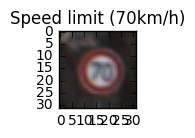

The following is the distribution of labels in the training data
Different images from the list are below
0


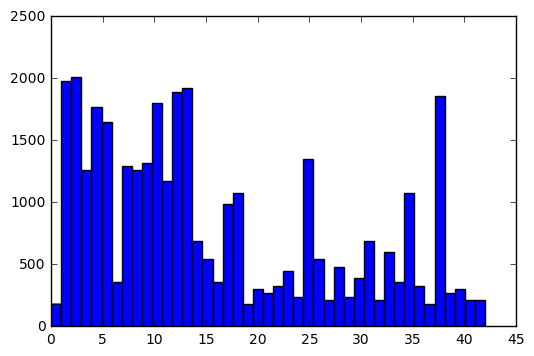

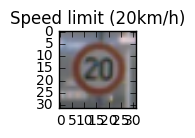

1


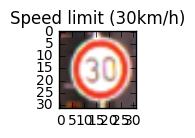

2


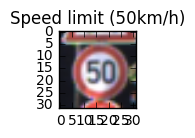

3


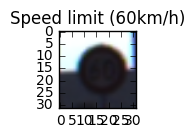

4


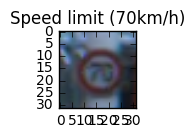

5


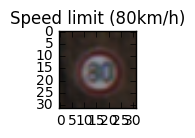

6


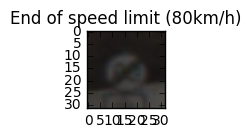

7


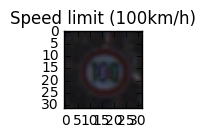

8


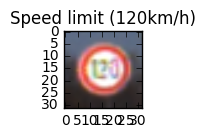

9


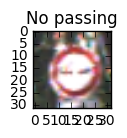

10


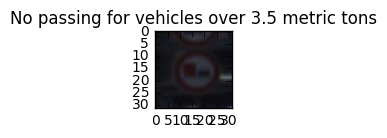

11


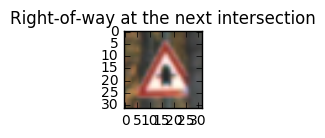

12


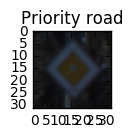

13


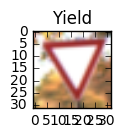

14


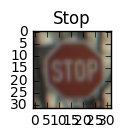

15


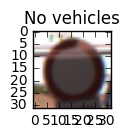

16


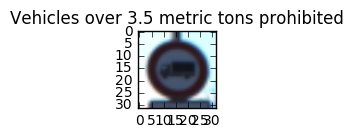

17


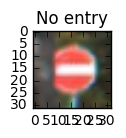

18


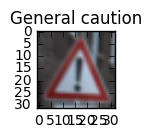

19


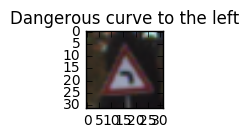

20


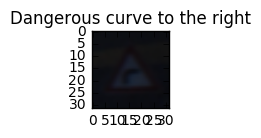

21


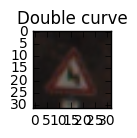

22


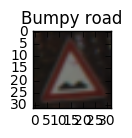

23


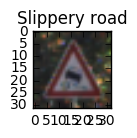

24


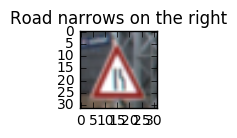

25


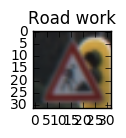

26


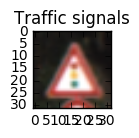

27


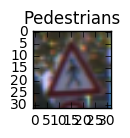

28


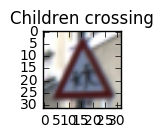

29


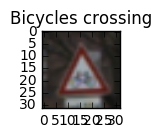

30


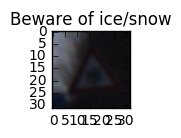

31


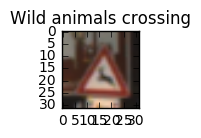

32


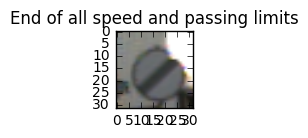

33


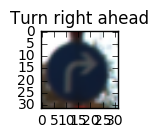

34


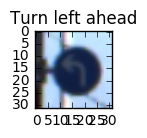

35


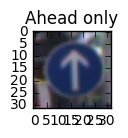

36


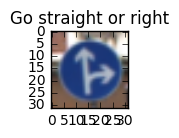

37


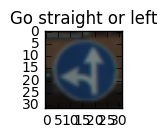

38


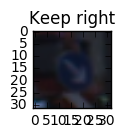

39


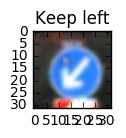

40


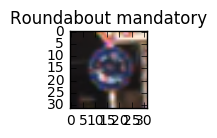

41


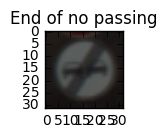

42


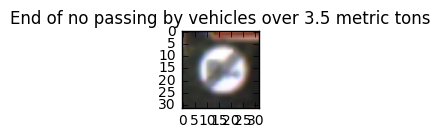

In [3]:

import matplotlib.pyplot as plt
import random
import csv 
from sklearn.utils import shuffle

with open('signnames.csv','r')  as file:
    reader1=csv.reader(file)
    namesList=np.array(list(reader1))
mynames=namesList[1:,1]
    
%matplotlib inline

def plotmyimage(img,title=''):
    #This function is used during the debug phase. 
    #This just plots the image 
    plt.figure(figsize=(1,1))
    plt.imshow(img,cmap='gray') 
    plt.title(title)
    plt.show()

X_train,y_train = shuffle(X_train,y_train)
randindex=random.randint(0,len(X_train))
print('A sample image shown below is at index {} with a label {}:'.format(randindex,y_train[randindex]))
randimage=X_train[randindex]
plotmyimage(randimage,mynames[y_train[randindex]])
print('The following is the distribution of labels in the training data')
plt.hist(y_train,n_classes)

print('Different images from the list are below')
for i in range(n_classes):
    print(i)
    s=np.where(y_train==i)
    plotmyimage(X_train[s[0][0]],mynames[i])


----

## Step 2: Model Architecture


There was a suggestion to look at [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) for inspirations, but I am not yet familiar with implementing parallel paths in same layer. I implemented my model as straightforward architecture, with just an additional layer compared to LeNet-5

### Pre-process the Data Set


Different images from the list are below
0


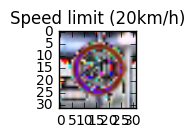

1


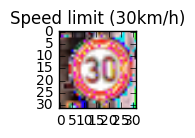

2


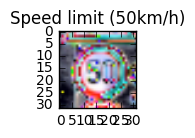

3


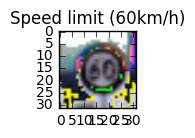

4


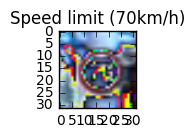

5


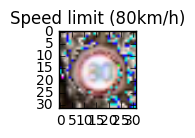

6


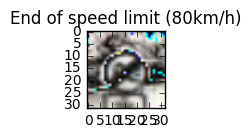

7


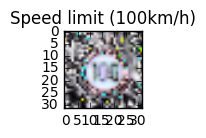

8


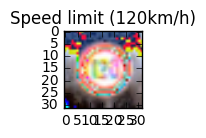

9


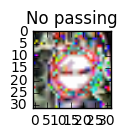

10


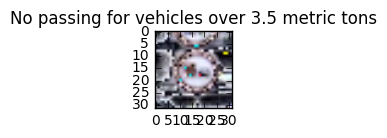

11


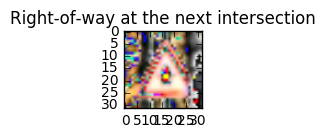

12


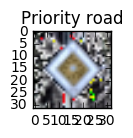

13


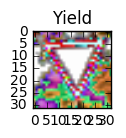

14


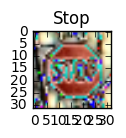

15


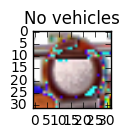

16


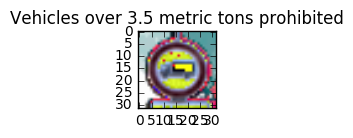

17


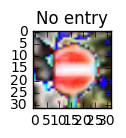

18


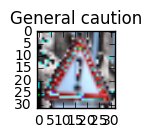

19


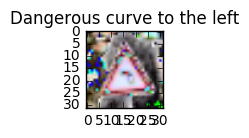

20


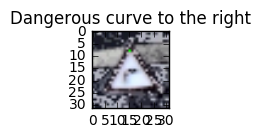

21


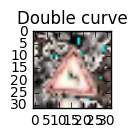

22


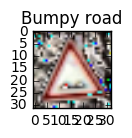

23


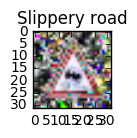

24


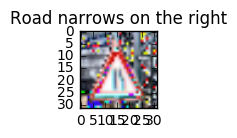

25


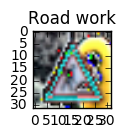

26


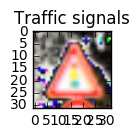

27


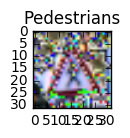

28


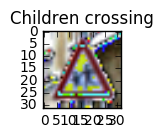

29


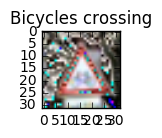

30


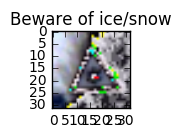

31


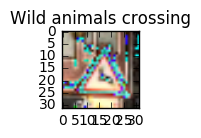

32


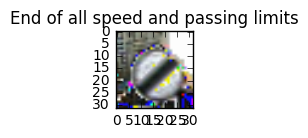

33


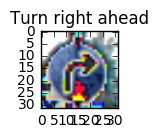

34


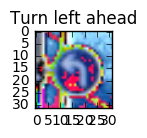

35


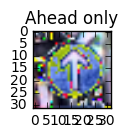

36


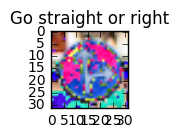

37


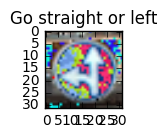

38


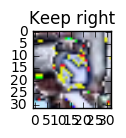

39


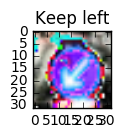

40


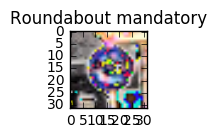

41


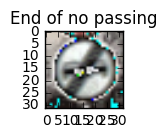

42


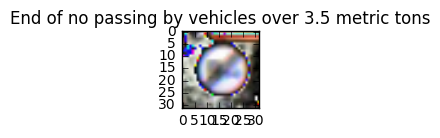

Processed the data


In [4]:


import cv2

def ScaleDownImagesRGB(inArray):
    imageArray=np.copy(inArray)
    for i in range(len(imageArray)):
        yuv=cv2.cvtColor(imageArray[i],cv2.COLOR_BGR2YUV)
        yuv[:,:,0] = cv2.equalizeHist(yuv[:,:,0])
        imageArray[i]=cv2.cvtColor(yuv, cv2.COLOR_YUV2BGR)
        imageArray[i]=imageArray[i].astype(np.float32)
    imageArray=(imageArray-128)/128
    return imageArray,3



def ScaleDownImagesGray(inArray):
    GrayArray=np.zeros((ColorArray.shape[0],ColorArray.shape[1],ColorArray.shape[2],1))
    for i in range(len(ColorArray)):
        GrayArray[i,:,:,0]=cv2.equalizeHist(cv2.cvtColor(ColorArray[i].astype(np.uint8),cv2.COLOR_RGB2GRAY))
        GrayArray[i]=(GrayArray[i]-GrayArray[i].mean())/GrayArray[i].std()
    return GrayArray,1


  
    
X_train,Image_Channels=ScaleDownImagesRGB(X_train)
X_valid,Image_Channels=ScaleDownImagesRGB(X_valid)
X_test,Image_Channels=ScaleDownImagesRGB(X_test)
#X_train=(X_train-128)/128
#X_valid=(X_valid-128)/128
#X_test=(X_test-128)/128

print('Different images from the list are below')
for i in range(n_classes):
    print(i)
    s=np.where(y_train==i)
    plotmyimage(X_train[s[0][0]],mynames[i])

#X_test=(X_test-X_test.mean(axis=3,keepdims=True))/X_test.std(axis=3,keepdims=True)

#X_train,Image_Channels=ScaleDownImagesGray(X_train_original)
#X_valid,Image_Channels=ScaleDownImagesGray(X_valid_original)
#X_test,Image_Channels=ScaleDownImagesGray(X_test_original)
  

print('Processed the data')

In [5]:
np.where(y_train==0)


(array([   74,   712,   736,   902,   914,   924,   973,  1170,  1244,
         1415,  2011,  2100,  2255,  2591,  2890,  3278,  3365,  3504,
         3601,  3974,  4062,  4224,  4387,  4833,  4857,  5367,  5648,
         5783,  5936,  6234,  6434,  6547,  7005,  7525,  7630,  8370,
         8553,  8608,  8629,  9316,  9373,  9500, 10093, 10474, 10556,
        10581, 10611, 10637, 10749, 10957, 11141, 11200, 11539, 11552,
        11668, 12099, 12478, 12541, 12575, 12996, 13154, 13333, 13375,
        13395, 13803, 14359, 14674, 15000, 15070, 15160, 15592, 16177,
        16310, 16469, 16513, 16586, 16644, 17113, 17627, 17676, 17685,
        18129, 18165, 18333, 18459, 18636, 18638, 18803, 18815, 19322,
        19429, 19450, 19640, 19649, 19813, 19884, 19958, 20012, 20074,
        20129, 20144, 20256, 20907, 20945, 21139, 21218, 21224, 21457,
        21471, 21486, 21604, 21648, 21659, 21771, 21790, 22575, 22859,
        23037, 23045, 23128, 23500, 23687, 23756, 24178, 24181, 24268,
      

### Model Architecture

In [ ]:
### Defined the architecture here.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    #  Layer 1: Convolutional. Input = 32x32xLayers. Output = 28x28x6.
    weight1=tf.Variable(tf.truncated_normal(shape=(5,5,Image_Channels,6), mean = mu, stddev = sigma))
    bias1=tf.Variable(tf.zeros(6))
    conv_layer=tf.nn.conv2d(x,weight1,strides=[1,1,1,1],padding='VALID')
    conv_layer=tf.nn.bias_add(conv_layer, bias1)
    
    #  Activation.
    conv_layer=tf.nn.relu(conv_layer)
    
    #  Pooling. Input = 28x28x6. Output = 14x14x6.
    conv_layer=tf.nn.max_pool(conv_layer,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    #  Layer 2: Convolutional. Output = 10x10x16.
    weight2=tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean = mu, stddev = sigma))
    bias2=tf.Variable(tf.zeros(16))
    conv_layer2=tf.nn.conv2d(conv_layer,weight2,strides=[1,1,1,1],padding='VALID')
    conv_layer2=tf.nn.bias_add(conv_layer2, bias2)
    
    #  Activation.
    conv_layer2=tf.nn.relu(conv_layer2)
    
    #  Pooling. Input = 10x10x16. Output = 5x5x16.
    conv_layer2=tf.nn.max_pool(conv_layer2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    #  Flatten. Input = 5x5x16. Output = 400.
    fc0=flatten(conv_layer2)
    
    #  Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(5*5*16, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.nn.bias_add(tf.matmul(fc0, fc1_W) , fc1_b)
    
    #  Activation.
    fc1    = tf.nn.relu(fc1)
    
    fc1=tf.nn.dropout(fc1,0.9)
    
    #  Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.nn.bias_add(tf.matmul(fc1, fc2_W) , fc2_b)
    
    #  Activation.
    fc2    = tf.nn.relu(fc2)
    
    fc2 = tf.nn.dropout(fc2, 0.65)
    
    #  Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.nn.bias_add(tf.matmul(fc2, fc3_W) , fc3_b)
    
    return logits

def MyNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    #  Layer 1: Convolutional. Input = 32x32xLayers. Output = 28x28x10.
    weight1=tf.Variable(tf.truncated_normal(shape=(5,5,Image_Channels,10), mean = mu, stddev = sigma))
    bias1=tf.Variable(tf.zeros(10))
    conv_layer=tf.nn.conv2d(x,weight1,strides=[1,1,1,1],padding='VALID')
    conv_layer=tf.nn.bias_add(conv_layer, bias1)
    # TODO: Activation.
    conv_layer=tf.nn.relu(conv_layer)
    # TODO: Pooling. Input = 28x28x10. Output = 14x14x10.
    conv_layer=tf.nn.max_pool(conv_layer,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    #  Layer 2: Convolutional. Output = 10x10x20
    weight2=tf.Variable(tf.truncated_normal(shape=(5,5,10,20), mean = mu, stddev = sigma))
    bias2=tf.Variable(tf.zeros(20))
    conv_layer2=tf.nn.conv2d(conv_layer,weight2,strides=[1,1,1,1],padding='VALID')
    conv_layer2=tf.nn.bias_add(conv_layer2, bias2)
    # TODO: Activation.
    conv_layer2=tf.nn.relu(conv_layer2)
    # TODO: Pooling. Input = 10x10x20. Output = 5x5x20.
    conv_layer2=tf.nn.max_pool(conv_layer2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

    #  Flatten. Input = 5x5x20. Output = 500.
    fc0=flatten(conv_layer2)
    
    # Layer 3: Fully Connected. Input = 500. Output = 700.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(500, 700), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(700))
    fc1   = tf.nn.bias_add(tf.matmul(fc0, fc1_W) , fc1_b)
    # TODO: Activation.
    fc1    = tf.nn.relu(fc1)
    #fc1=tf.nn.dropout(fc1,Keep)
    
    # Layer 4: Fully Connected. Input = 700. Output = 200.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(700, 200), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(200))
    fc2    = tf.nn.bias_add(tf.matmul(fc1, fc2_W) , fc2_b)
    # TODO: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, Keep)
    
    #  Layer 5: Fully Connected. Input = 200. Output = 80.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(200, 80), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(80))
    fc3 = tf.nn.bias_add(tf.matmul(fc2, fc3_W) , fc3_b)
    # TODO: Activation.
    fc3    = tf.nn.relu(fc3)
    fc3 = tf.nn.dropout(fc3, Keep)
    
    # TODO: Layer 6: Fully Connected. Input = 80. Output = 43.
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(80, 43), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(43))
    logits = tf.nn.bias_add(tf.matmul(fc3, fc4_W) , fc4_b)

    
    return logits

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, Keep:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


x = tf.placeholder(tf.float32,shape=[None,32,32,Image_Channels])
y = tf.placeholder(tf.int32, (None))
Keep=tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)




myrate=tf.placeholder(tf.float32)

logits = MyNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = myrate)
training_operation = optimizer.minimize(loss_operation)


correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


saver = tf.train.Saver()

print('Defined and created the model graph.')

Defined and created the model graph.


### Train, Validate and Test the Model

The validation set is be used to assess how well the model is performing. 

In [ ]:



EPOCHS = 20
BATCH_SIZE=100
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,Keep:0.85,myrate:(0.001)})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './mynet')
    print("Model saved")


Training...

EPOCH 1 ...
Validation Accuracy = 0.474



In [ ]:
print('Testing the model with pickled test data.')
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

---

## Step 3: Test the Model on New Images

I googled german traffic signs for images for obtaining the images to test my model. To obtain the 32X32 images, I zoomed out the pages and took screenshots to match the size.


### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
myfiles=os.listdir('new-images/')
mylabels=[11,12,13,17,26,36,38]

imlist=[]
for file in myfiles:
    print(file)
    tmp=cv2.imread('new-images/'+file)
    tmp=cv2.cvtColor(tmp,cv2.COLOR_BGR2RGB)
    imlist.append(tmp) 
    plotmyimage(imlist[-1])
    
imarray=np.array(imlist,dtype='uint8')
print(imarray.shape)
#imarray,_=ScaleDownImagesGray(imarray)
imarray,_=ScaleDownImagesRGB(imarray)
print(imarray.shape)

### Predict the Sign Type for Each Image

In [ ]:

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(imarray, mylabels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
mysoftmax=tf.nn.softmax(logits)
top3=tf.nn.top_k(mysoftmax,k=3)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    mysoftmax_val=sess.run(mysoftmax,feed_dict={x:imarray,Keep:1.0})
    top3_val=sess.run(top3,feed_dict={x:imarray,Keep:1.0})

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [ ]:
print(top3_val)

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [ ]:
X_train[0].shape
